# 3.9 Common Probability Distributions

In [1]:
import torch
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import os

### 3.9.1 Bernoulli Distribution

The most basic distribution:

- **Bernoulli distribution** is a distribution over a single random variable, modulated by a single parameter $\phi \in [0,1]$ that represents the probability of such single-rand-variable being equal to 1.

\begin{equation}
  P(\text{x}=x) = \phi^x (1-\phi)^{1-x}
    \begin{cases}
      P(\text{x}=1)=\phi  \\
      P(\text{x}=0)=1-\phi 
    \end{cases}
    \tag{3.15}
\end{equation}

\begin{equation}
  E_{\text{x}}[\text{x}] = \phi 
  \tag{3.16}
\end{equation}

\begin{equation}
  \text{Var}_{\text{x}}[\text{x}] = \phi (1 - \phi)
  \tag{3.17}
\end{equation}

In [2]:
# Bernoulli
# prob of single rand var being equal to phi
phi = 0.7 
P_bernoulli = lambda x: phi**x * (1-phi)**(1-x)
x_bernoulli = np.random.choice((0, 1), size=1)
print(f'x = {x_bernoulli}')
print(f'P(x) = {P_bernoulli(x_bernoulli)}')

x = [1]
P(x) = [0.7]


### 3.9.2 Multinolli Distribution

- Distribution over a single variable over multiple $k$ states -> thus it is great for representing discrete categories
- Parameterized by a vector $\boldsymbol{p}\in [0,1]^{k-1}$, where $p_i$ gives the probability of the i-th state
- The probability of the last state is: $p_k = 1 - \boldsymbol{1}^{\top}\boldsymbol{p}$

In [3]:
# Multinolli
# one trial where rv can be any of the k states

k = 5 # k states

# prob of the single rv being in (k-1)-th state
p = torch.zeros((k,1))
ix = np.random.choice(range(k))
if ix != k:
    p[ix,0] = 1.0

# Matrix of ones
ones = torch.ones((1,k))
onesT = ones.transpose(0,1)

# last state p_k
p[-1,0] = 1 - onesT[:-1,0].dot(p[:-1, 0])
p

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.]])

### 3.9.3 Gaussian / Normal Distribution

- The most common probability distribution in nature.
- Has two parameters: $\mu \in \mathbb{R}$ and $\sigma \in (0,\infty)$
- Or in ML fields it is cheaper to work with the **precision parameter**: $\beta = \sigma^{-2}, \boldsymbol{\beta}=\boldsymbol{\Sigma}^{-1}$ for the normal and multivariate cases, respectively. Because we don't have to invert a matrix.

\begin{equation}
\mathcal{N}(x ; \mu, \beta)=\sqrt{\frac{\beta}{2 \pi}} \exp \left(-\frac{\beta}{2}(x -\mu)^2\right) \tag{3.18}
\end{equation}

#### Multivariate Normal Distribution
\begin{equation}
\mathcal{N}(\boldsymbol{x} ; \boldsymbol{\mu}, \boldsymbol{\beta})=\sqrt{\frac{\operatorname{det}(\boldsymbol{\beta})}{(2 \pi)^n}} \exp \left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\beta}(\boldsymbol{x}-\boldsymbol{\mu})\right) \tag{3.19}
\end{equation}

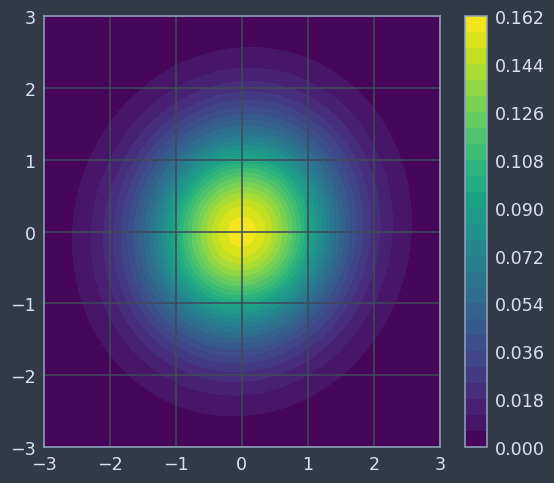

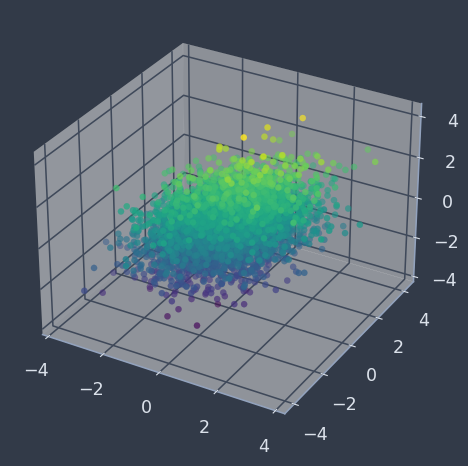

In [5]:
# Normal Distribution
gauss_mean = torch.tensor([0, 0], dtype=torch.float32)
gauss_cov = torch.tensor([[1, 0.05], [0.05, 1]], dtype=torch.float32)

gauss_x = torch.linspace(-3, 3, 100, dtype=torch.float32)
gauss_y = torch.linspace(-3, 3, 100, dtype=torch.float32)
gauss_x, gauss_y = torch.meshgrid(gauss_x, gauss_y)
gauss_pos = torch.stack((gauss_x, gauss_y), dim=2)

gauss_rv = torch.distributions.multivariate_normal.MultivariateNormal(gauss_mean, gauss_cov)
gauss_z = gauss_rv.log_prob(gauss_pos).exp()

plt.contourf(gauss_x, gauss_y, gauss_z, levels=30)
plt.colorbar()
plt.show()

mean = torch.tensor([0, 0, 0], dtype=torch.float32)
cov = torch.tensor([[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]], dtype=torch.float32)
x = torch.distributions.multivariate_normal.MultivariateNormal(mean, cov).sample((5000,))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=x[:, 2])
plt.show()